In [1]:
!pip install pandas 
!pip install --upgrade pandas
!pip install seaborn
!pip install matplotlib
!pip install scipy

In [2]:
import pandas as pd

# Carica il dataset da un file CSV
cyclists = pd.read_csv('dataset/dataset/cyclists.csv')
races = pd.read_csv('dataset/dataset/races.csv')


# Races dataset

In [3]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [4]:
races.nunique()

_url                     5281
name                       61
points                     14
uci_points                 20
length                   1280
climb_total              2117
profile                     5
startlist_quality         697
average_temperature        27
date                   140509
position                  210
cyclist                  6095
cyclist_age                29
is_tarmac                   2
is_cobbled                  1
is_gravel                   1
cyclist_team               91
delta                    2836
dtype: int64

In [5]:
races.isnull().sum()

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64

<Axes: >

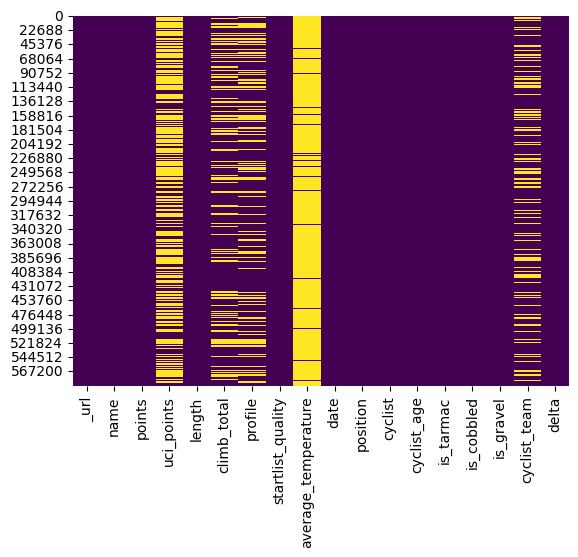

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(races.isnull(), cbar=False, cmap='viridis')  # .isnull() restituisce True per valori NaN


In [7]:
# Verifichiamo quanti valori distinti ci sono tra le nostre variabili booleane

print(races['is_tarmac'].value_counts())
print(races['is_cobbled'].value_counts())
print(races['is_gravel'].value_counts())

is_tarmac
True     536042
False     53823
Name: count, dtype: int64
is_cobbled
False    589865
Name: count, dtype: int64
is_gravel
False    589865
Name: count, dtype: int64


1) Delete is_cobbled and is_gravel
2) Check consistency of is_tarmac (no false and true for the same race)

In [8]:
# Control of the consistency of false data of 'is_tarmac'

consistency = races.groupby('_url')['is_tarmac'].nunique()

# Find races with inconstistency
inconsistent_races = consistency[consistency > 1].index

# Mostra le gare inconsitenti
if len(inconsistent_races) > 0:
    print("Inconsistent races:", inconsistent_races.tolist())
else:
    print("No inconsistent races")

No inconsistent races


In [9]:
# Check if points and uci_points can be merged or if we can impute one value using the other

righe_null = races[races['points'].isnull() & races['uci_points'].isnull()]

print("Rows where each column is null:")
print(f'{len(righe_null)} out of {races["points"].isnull().sum()} null values for points and {races["uci_points"].isnull().sum()} null values for uci_points')


Rows where each column is null:
477 out of 477 null values for points and 338779 null values for uci_points


In [10]:
# Since they cannot be merged, what about checking the overall correlation and delete one or create an index starting from the 2



# Cyclists dataset

In [11]:
# Let's see how many missing values there are

cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

In [12]:
cyclists.nunique()

_url           6134
name           6127
birth_year       71
weight           59
height           48
nationality      72
dtype: int64

In [13]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


<Axes: >

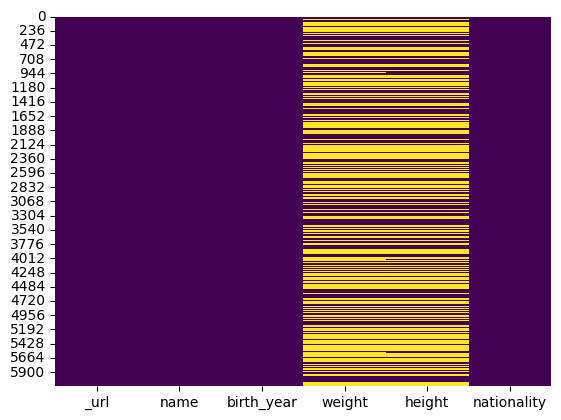

In [14]:
sns.heatmap(cyclists.isnull(), cbar=False, cmap='viridis')  # .isnull() restituisce True per valori NaN


In [15]:
cyclists['birth_year'].min()

1933.0

In [16]:
cyclists['birth_year'].max()

2004.0

c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='birth_year', ylabel='Count'>

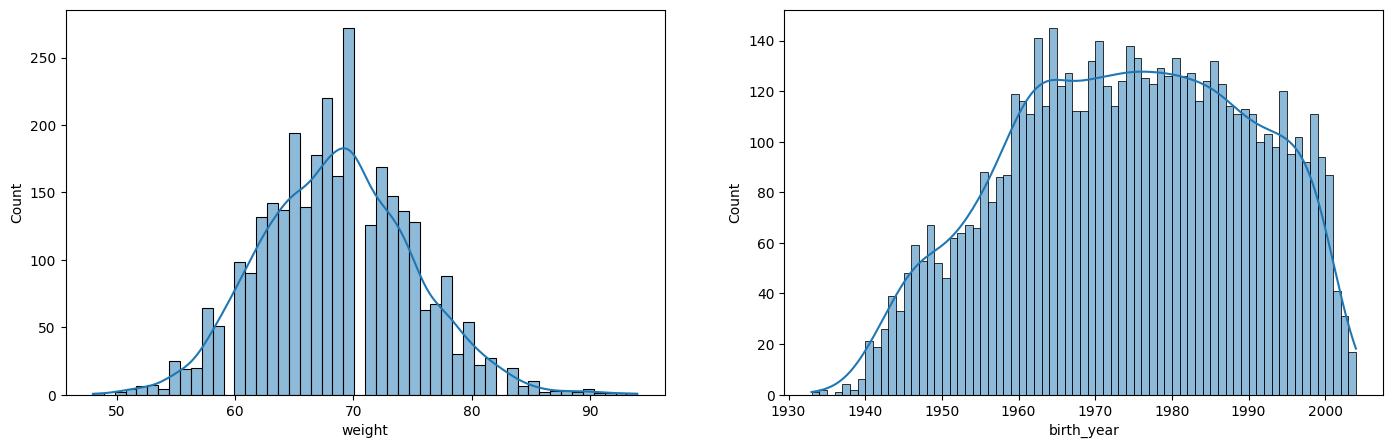

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(17, 5))  # 1 riga, 3 colonne

sns.histplot(cyclists, 
            x="weight", 
            bins=50, 
            kde=True,
            ax=axs[0])  # Disegna sull'asse specifico

sns.histplot(cyclists, 
            x="birth_year", 
            bins=71, 
            kde=True,
            ax=axs[1])  # Disegna sull'asse specifico



# High correlation between height and weight
As we can expect, weight and height are highly correlated, maybe we can merge the two features into one index?

# MERGE THE DATASETS AND CLEAN

In this part i want to merge the 2 datasets (using url as key) and possibly clean it or replace values that are missing.

In [18]:
from utils import merge_dataset

merged_dataset = merge_dataset(dataset1= cyclists,
                               dataset2= races,
                               key_left= '_url',
                               key_right= 'cyclist')

In [19]:
merged_dataset.head()

,_url_x,name_x,birth_year,weight,height,nationality,_url_y,name_y,points,uci_points,...,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy,vuelta-a-espana/1989/stage-1,Vuelta a España,80.0,NaN,...,NaN,1989-04-24 00:25:33,110,bruno-surra,25.0,True,False,False,NaN,15.0
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1997/stage-2,Tour de France,100.0,NaN,...,NaN,1997-07-07 06:27:47,132,gerard-rue,32.0,True,False,False,denmark-1991,0.0
2,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-1,Tour de France,100.0,NaN,...,NaN,1990-07-01 03:29:36,66,gerard-rue,25.0,True,False,False,france-1978,635.0
3,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1992/stage-7,Tour de France,100.0,NaN,...,NaN,1992-07-11 04:22:52,35,gerard-rue,27.0,True,False,False,france-1978,65.0
4,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-9,Tour de France,100.0,NaN,...,NaN,1990-07-09 04:46:44,41,gerard-rue,25.0,True,False,False,france-1978,37.0


# Removed stuff

From the merged dataset we end up with: \
<span style="color: red;">deleted features</span>

_url_x \
<span style="color: red;"> name_x </span> deleted because we use url_x for identification \
birth_year \
<span style="color: red;">weight </span> deleted because many values are missing \
<span style="color: red;">height </span> deleted because many values are missing \
nationality \
<span style="color: red;">_url_y </span> deleted because we use url_x for identification \
<span style="color: red;">name_y </span> deleted because we use url_x for identification \
points\
uci_points\
length
climb_total\
profile
startlist_quality\
<span style="color: red;">average_temperature </span> deleted because many values are missing \
date
position\
<span style="color: red;">cyclist </span> deleted because we use url_x for identification \
cyclist_age\
is_tarmac\
<span style="color: red;">is_cobbled </span> deleted because all false \
<span style="color: red;">is_gravel </span> deleted because all false \
delta



In [20]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url_x               589865 non-null  object 
 1   name_x               589865 non-null  object 
 2   birth_year           589752 non-null  float64
 3   weight               478431 non-null  float64
 4   height               479746 non-null  float64
 5   nationality          589813 non-null  object 
 6   _url_y               589865 non-null  object 
 7   name_y               589865 non-null  object 
 8   points               589388 non-null  float64
 9   uci_points           251086 non-null  float64
 10  length               589865 non-null  float64
 11  climb_total          442820 non-null  float64
 12  profile              441671 non-null  float64
 13  startlist_quality    589865 non-null  int64  
 14  average_temperature  29933 non-null   float64
 15  date             

Per iniziare togliere 'is_gravel' e 'is_cobbled' potrebbe essere una buona idea dato che sono sempre false, magari lasciamo 'is_tarmac' dato che varia un po' di più e utiliziamo solamente il fatto che una strada può essere asfaltata o no

In [67]:
final_dataset = merged_dataset.drop(columns=['name_x','height','average_temperature','weight','cyclist'])

In [54]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _url_x             589865 non-null  object 
 1   birth_year         589752 non-null  float64
 2   nationality        589813 non-null  object 
 3   _url_y             589865 non-null  object 
 4   name_y             589865 non-null  object 
 5   points             589388 non-null  float64
 6   uci_points         251086 non-null  float64
 7   length             589865 non-null  float64
 8   climb_total        442820 non-null  float64
 9   profile            441671 non-null  float64
 10  startlist_quality  589865 non-null  int64  
 11  date               589865 non-null  object 
 12  cyclist_age        589752 non-null  float64
 13  is_tarmac          589865 non-null  bool   
 14  is_cobbled         589865 non-null  bool   
 15  is_gravel          589865 non-null  bool   
 16  cy

In [55]:
final_dataset.isnull().sum()

_url_x                    0
birth_year              113
nationality              52
_url_y                    0
name_y                    0
points                  477
uci_points           338779
length                    0
climb_total          147045
profile              148194
startlist_quality         0
date                      0
cyclist_age             113
is_tarmac                 0
is_cobbled                0
is_gravel                 0
cyclist_team         159161
dtype: int64

# Feature Engeneering

In [60]:
import re


# Controllo se la data dell'url corrisponde con la data di 'date'prima di andare a sostituire
# Es: 
# url: vuelta-a-espana/2017/stage-20 
# date: 2017-09-09 03:31:33
# In this case 2017 is the same so there are no errors, i can change the date to 2017 safely

different = []
pattern = r'(?P<anno>\d{4})'

for index,(url,date) in enumerate(zip(final_dataset['_url_y'],final_dataset['date'])):
    first = re.search(pattern, url).group()
    second = re.search(r'\d+', date).group()
    if(first != second):
        different.append(index)

if(len(different) == 0):
    print('No different values')


No different values


In [50]:
# # I change the 'date' value with the year only

# for url,date in enumerate(zip(final_dataset['_url_y'],final_dataset['date'])):
#     first = re.search(pattern, url).group()
#     second = re.search(r'\d+', date).group()


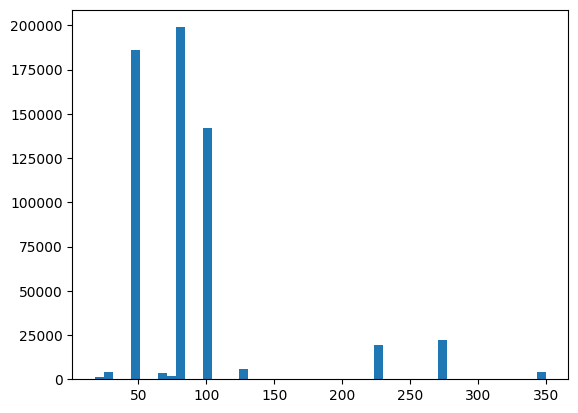

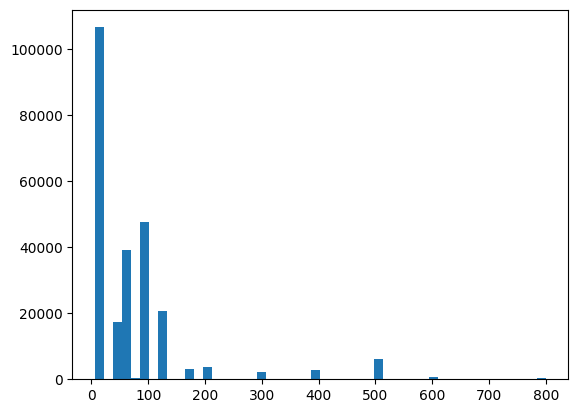

In [79]:
plt.hist(final_dataset['points'].dropna(), bins=50)
# plt.yscale('log')
# sns.histplot(final_dataset['uci_points'].dropna(), 
#             bins=50, 
#             kde=True,
#             ax=axs[2])  # Disegna sull'asse specifico


plt.show()

plt.hist(final_dataset['uci_points'].dropna(), bins=50)
# plt.yscale('log')
# sns.histplot(final_dataset['uci_points'].dropna(), 
#             bins=50, 
#             kde=True,
#             ax=axs[2])  # Disegna sull'asse specifico


plt.show()

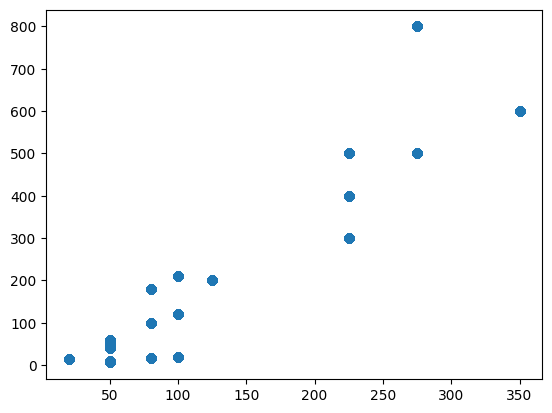

In [84]:
plt.scatter(final_dataset.dropna()['points'],final_dataset.dropna()['uci_points'])



<class 'pandas.core.frame.DataFrame'>
Index: 220727 entries, 223 to 589864
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   birth_year         220727 non-null  float64
 1   points             220727 non-null  float64
 2   uci_points         220727 non-null  float64
 3   length             220727 non-null  float64
 4   climb_total        220727 non-null  float64
 5   startlist_quality  220727 non-null  float64
 6   position           220727 non-null  float64
 7   cyclist_age        220727 non-null  float64
 8   delta              220727 non-null  float64
dtypes: float64(9)
memory usage: 16.8 MB
None


c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


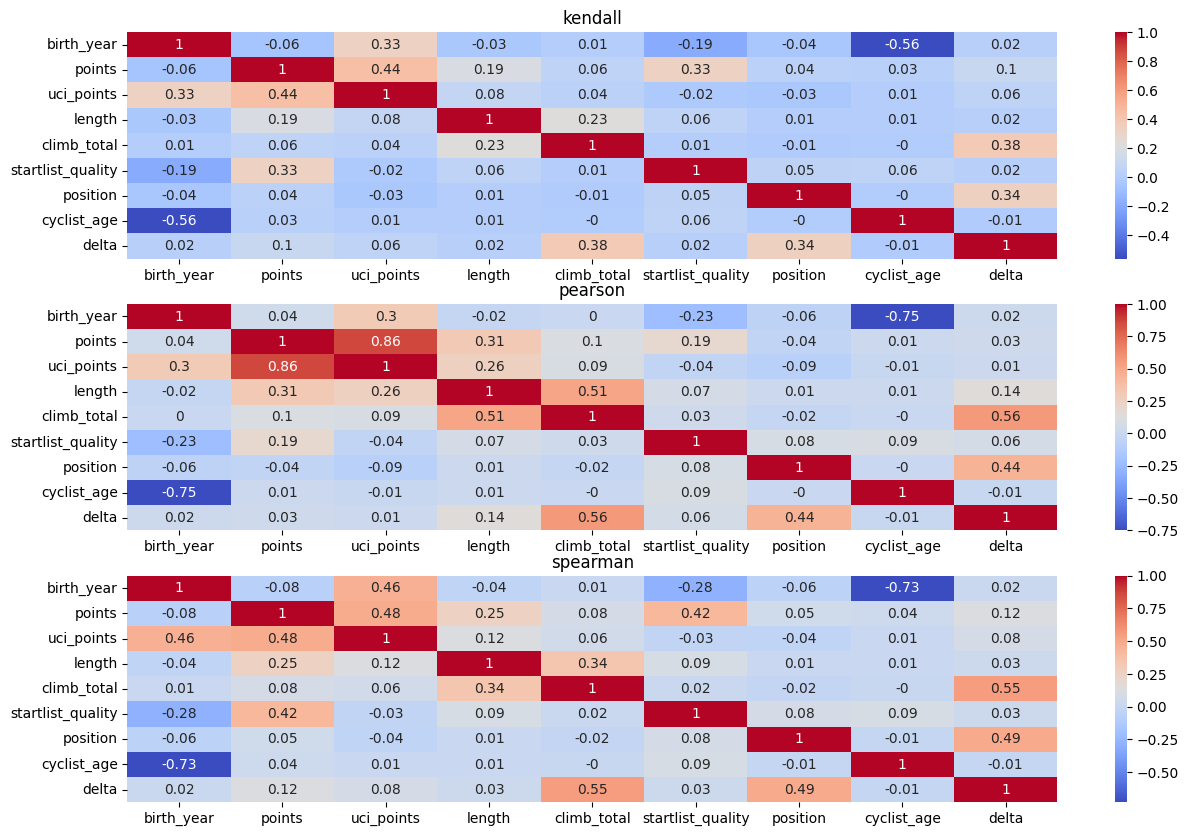

In [68]:
from dataunderstanding import correlations
import seaborn as sns
import matplotlib.pyplot as plt

#change type
#final_dataset['points'] = final_dataset['points'].astype(object)
final_dataset['uci_points'] = final_dataset['uci_points'].astype('float64')
final_dataset['profile'] = final_dataset['profile'].astype(object)
final_dataset['startlist_quality'] = final_dataset['startlist_quality'].astype('float64')
final_dataset['position'] = final_dataset['position'].astype('float64')
#final_dataset['startlist_quality'] = final_dataset['startlist_quality'].astype(object)

# Dataset where all the record with at least 1 value null are dropped
final_dataset_nonull = final_dataset.dropna()

# Dataset where i only take numerical columns
final_dataset_numerical = final_dataset_nonull.select_dtypes(include="number")

print(final_dataset_numerical.info())

# Correlations of final dataset
correlations_final = correlations(final_dataset_numerical.round(2))

# List of different correlations: Pearson,
correlations = []
for tipo in correlations_final['correlation_type'].unique():
    df_tipo = correlations_final[correlations_final['correlation_type'] == tipo]

    correlations.append(df_tipo)

# Plot the correlations matrices with heatmaps
plt.figure(figsize=(15,10))

# Plot of the kendall correlation
plt.subplot(3, 1, 1)  # 3 righe, 1 colonna, primo grafico
plt.title(correlations[0]["correlation_type"].iloc[1])
tmp = correlations[0].drop(columns='correlation_type')
sns.heatmap(tmp.round(2),annot=True, cmap='coolwarm')

# Plot of the pearson correlation
plt.subplot(3, 1, 2)
plt.title(correlations[1]["correlation_type"].iloc[1])
tmp = correlations[1].drop(columns='correlation_type')
sns.heatmap(tmp.round(2),annot=True, cmap='coolwarm')

# Plot of the spearman correlation
plt.subplot(3, 1, 3)
plt.title(correlations[2]["correlation_type"].iloc[1])
tmp = correlations[2].drop(columns='correlation_type')
sns.heatmap(tmp.round(2),annot=True, cmap='coolwarm')

plt.show()